# How Much Have I Spent On Amazon? A Data Analysis Project

In this project, I'm going to analyze my total order history from Amazon for 13 years since I first used the service. This dataset will be based on records starting from 1/1/2007 all the way until today (5/20/2020).

I'm scared. But let's get started.

### Reading In The Data

In [1]:
import pandas as pd

df = pd.read_csv("amazon-orders.csv")
df.head()

,Order Date,Order ID,Payment Instrument Type,Website,Shipment Date,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged
0,07/06/07,103-2764742-3491028,Visa - 1453,Amazon.com,07/06/07,MA,01970-1947,Shipped,NaN,$14.40,$9.50,$0.00,$0.00,$0.00,$23.90
1,09/22/08,104-7596537-6649000,Visa - 1453,Amazon.com,09/23/08,MA,01970-1947,Shipped,UPS(1Z4137VY0340540107),$39.95,$9.99,$0.00,$0.00,$0.00,$49.94
2,02/11/11,102-5161586-1874623,Gift Certificate/Card,Amazon.com,02/15/11,MA,1970,Shipped,UPS(1Z787Y561244238320),$9.65,$3.43,$0.00,$3.43,$0.00,$9.65
3,02/11/11,102-5161586-1874623,Gift Certificate/Card,Amazon.com,02/15/11,MA,1970,Shipped,USPS(9102901001302207651788),$23.91,$3.98,$0.00,$3.98,$0.00,$23.91
4,02/11/11,102-5161586-1874623,Gift Certificate/Card,Amazon.com,02/13/11,MA,1970,Shipped,USPS(9102901001298212501449),$19.95,$2.32,$0.00,$2.32,$0.00,$19.95


In [2]:
df.shape

(350, 15)

### Cleaning The Data

In [3]:
# Replace null values with 0
df = df.fillna(0)
df.head()

,Order Date,Order ID,Payment Instrument Type,Website,Shipment Date,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged
0,07/06/07,103-2764742-3491028,Visa - 1453,Amazon.com,07/06/07,MA,01970-1947,Shipped,0,$14.40,$9.50,$0.00,$0.00,$0.00,$23.90
1,09/22/08,104-7596537-6649000,Visa - 1453,Amazon.com,09/23/08,MA,01970-1947,Shipped,UPS(1Z4137VY0340540107),$39.95,$9.99,$0.00,$0.00,$0.00,$49.94
2,02/11/11,102-5161586-1874623,Gift Certificate/Card,Amazon.com,02/15/11,MA,1970,Shipped,UPS(1Z787Y561244238320),$9.65,$3.43,$0.00,$3.43,$0.00,$9.65
3,02/11/11,102-5161586-1874623,Gift Certificate/Card,Amazon.com,02/15/11,MA,1970,Shipped,USPS(9102901001302207651788),$23.91,$3.98,$0.00,$3.98,$0.00,$23.91
4,02/11/11,102-5161586-1874623,Gift Certificate/Card,Amazon.com,02/13/11,MA,1970,Shipped,USPS(9102901001298212501449),$19.95,$2.32,$0.00,$2.32,$0.00,$19.95


### How Much Did I Spend In Total On Amazon?

Now that we understand the data a little bit, let's investigate the "Total Charged" column.

In [4]:
# Convert Total Charged to float
df["Total Charged"] = df["Total Charged"].str.replace('$', '').astype(float)
df.head()

,Order Date,Order ID,Payment Instrument Type,Website,Shipment Date,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged
0,07/06/07,103-2764742-3491028,Visa - 1453,Amazon.com,07/06/07,MA,01970-1947,Shipped,0,$14.40,$9.50,$0.00,$0.00,$0.00,23.90
1,09/22/08,104-7596537-6649000,Visa - 1453,Amazon.com,09/23/08,MA,01970-1947,Shipped,UPS(1Z4137VY0340540107),$39.95,$9.99,$0.00,$0.00,$0.00,49.94
2,02/11/11,102-5161586-1874623,Gift Certificate/Card,Amazon.com,02/15/11,MA,1970,Shipped,UPS(1Z787Y561244238320),$9.65,$3.43,$0.00,$3.43,$0.00,9.65
3,02/11/11,102-5161586-1874623,Gift Certificate/Card,Amazon.com,02/15/11,MA,1970,Shipped,USPS(9102901001302207651788),$23.91,$3.98,$0.00,$3.98,$0.00,23.91
4,02/11/11,102-5161586-1874623,Gift Certificate/Card,Amazon.com,02/13/11,MA,1970,Shipped,USPS(9102901001298212501449),$19.95,$2.32,$0.00,$2.32,$0.00,19.95


In [5]:
df["Total Charged"].sum()

12335.55

It appears that my total spend on Amazon over 13 years is __$12,335.55.__

Yikes. 

Let's see some other statistics on the Total Charged column.

In [6]:
df["Total Charged"].mean()

35.24442857142853

In [7]:
df["Total Charged"].median()

20.08

In [8]:
df["Total Charged"].max()

728.2

In [9]:
df["Total Charged"].min()

0.0

So my mean order was $35 per order.

The MOST I've paid in one order was $728.20.

The LEAST I've paid was $0, likely in the form of a free e-book.

### How Much Have I Paid in Sales Tax?

In [10]:
df["Tax Charged"] = df["Tax Charged"].str.replace('$', '').astype(float)
df.head()

,Order Date,Order ID,Payment Instrument Type,Website,Shipment Date,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged
0,07/06/07,103-2764742-3491028,Visa - 1453,Amazon.com,07/06/07,MA,01970-1947,Shipped,0,$14.40,$9.50,$0.00,$0.00,0.0,23.90
1,09/22/08,104-7596537-6649000,Visa - 1453,Amazon.com,09/23/08,MA,01970-1947,Shipped,UPS(1Z4137VY0340540107),$39.95,$9.99,$0.00,$0.00,0.0,49.94
2,02/11/11,102-5161586-1874623,Gift Certificate/Card,Amazon.com,02/15/11,MA,1970,Shipped,UPS(1Z787Y561244238320),$9.65,$3.43,$0.00,$3.43,0.0,9.65
3,02/11/11,102-5161586-1874623,Gift Certificate/Card,Amazon.com,02/15/11,MA,1970,Shipped,USPS(9102901001302207651788),$23.91,$3.98,$0.00,$3.98,0.0,23.91
4,02/11/11,102-5161586-1874623,Gift Certificate/Card,Amazon.com,02/13/11,MA,1970,Shipped,USPS(9102901001298212501449),$19.95,$2.32,$0.00,$2.32,0.0,19.95


In [11]:
df["Tax Charged"].sum()

529.94

In [12]:
df["Tax Charged"].sum() / df["Total Charged"].sum()

0.04296038684939059

I've effectively been paying a 4.3% tax rate on all of my orders.

### Analyzing Amazon Spending Over Time

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Order Date,Order ID,Payment Instrument Type,Website,Shipment Date,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged
0,2007-07-06,103-2764742-3491028,Visa - 1453,Amazon.com,07/06/07,MA,01970-1947,Shipped,0,$14.40,$9.50,$0.00,$0.00,0.0,23.90
1,2008-09-22,104-7596537-6649000,Visa - 1453,Amazon.com,09/23/08,MA,01970-1947,Shipped,UPS(1Z4137VY0340540107),$39.95,$9.99,$0.00,$0.00,0.0,49.94
2,2011-02-11,102-5161586-1874623,Gift Certificate/Card,Amazon.com,02/15/11,MA,1970,Shipped,UPS(1Z787Y561244238320),$9.65,$3.43,$0.00,$3.43,0.0,9.65
3,2011-02-11,102-5161586-1874623,Gift Certificate/Card,Amazon.com,02/15/11,MA,1970,Shipped,USPS(9102901001302207651788),$23.91,$3.98,$0.00,$3.98,0.0,23.91
4,2011-02-11,102-5161586-1874623,Gift Certificate/Card,Amazon.com,02/13/11,MA,1970,Shipped,USPS(9102901001298212501449),$19.95,$2.32,$0.00,$2.32,0.0,19.95


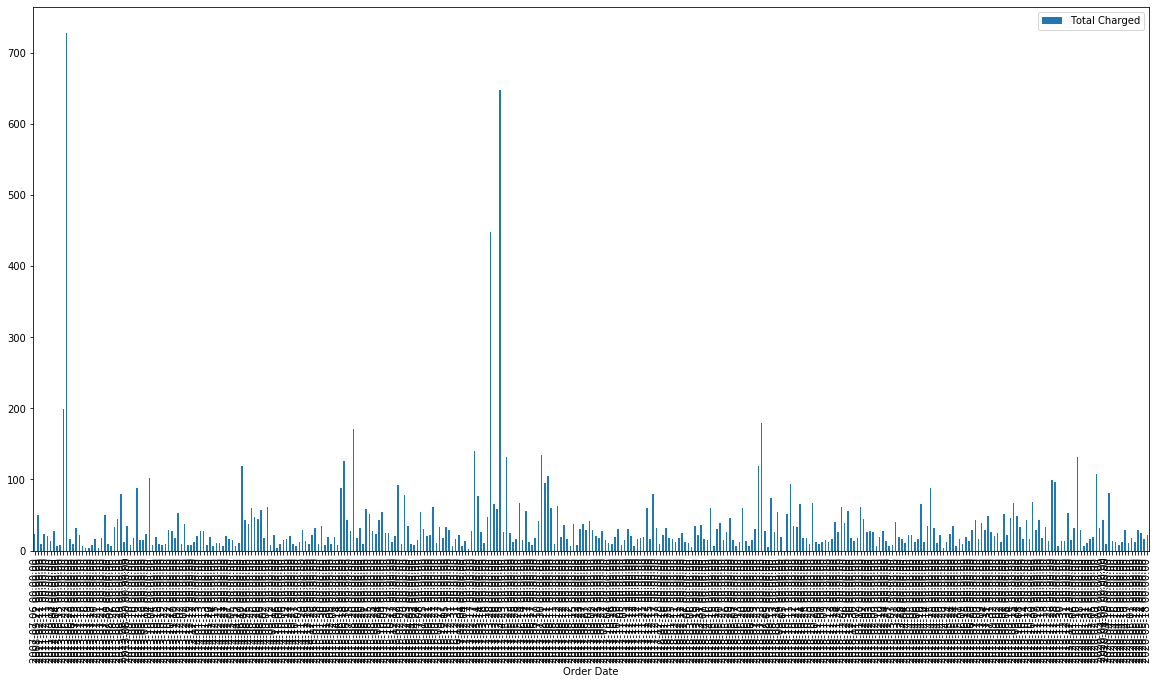

In [14]:
%matplotlib inline

df.plot.bar(x='Order Date', y='Total Charged', rot=90, figsize=(20,10))


In [15]:
daily_orders = df.groupby('Order Date').sum()["Total Charged"]
daily_orders.head()

Order Date
2007-07-06    23.90
2008-09-22    49.94
2011-02-11    53.51
2011-03-13    13.06
2012-08-04    33.56
Name: Total Charged, dtype: float64

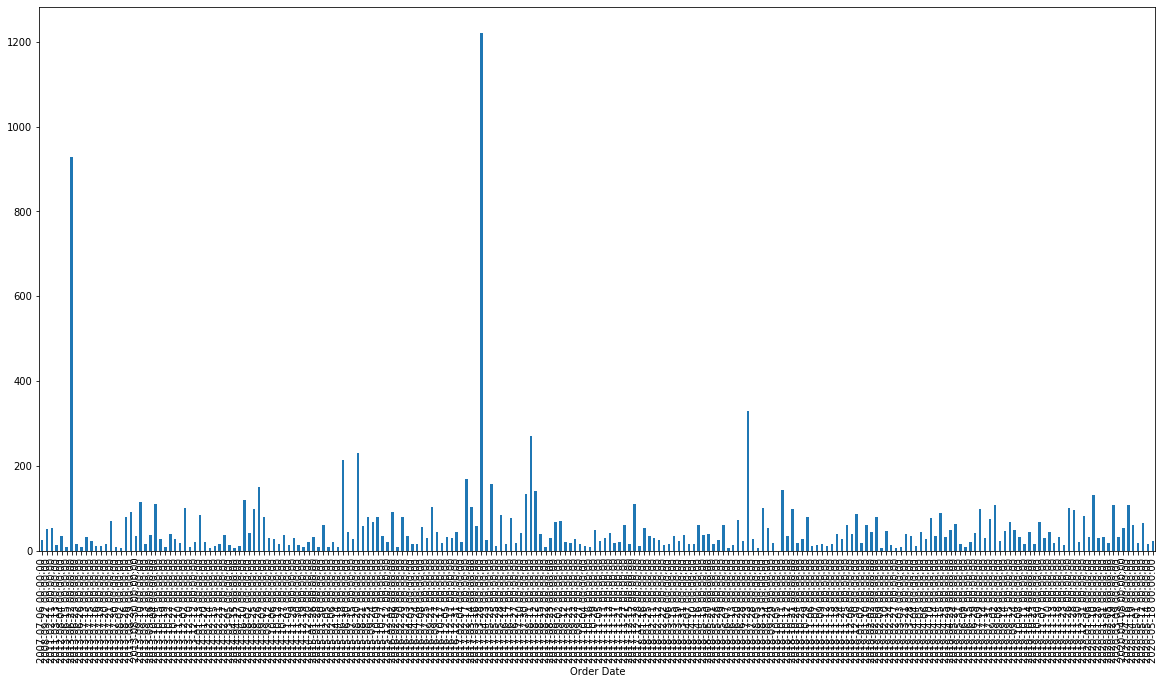

In [16]:
daily_orders.plot.bar(figsize=(20,10))

In [17]:
df['month_year'] = pd.to_datetime(df['Order Date']).dt.to_period('M')
df.head()

,Order Date,Order ID,Payment Instrument Type,Website,Shipment Date,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,month_year
0,2007-07-06,103-2764742-3491028,Visa - 1453,Amazon.com,07/06/07,MA,01970-1947,Shipped,0,$14.40,$9.50,$0.00,$0.00,0.0,23.90,2007-07
1,2008-09-22,104-7596537-6649000,Visa - 1453,Amazon.com,09/23/08,MA,01970-1947,Shipped,UPS(1Z4137VY0340540107),$39.95,$9.99,$0.00,$0.00,0.0,49.94,2008-09
2,2011-02-11,102-5161586-1874623,Gift Certificate/Card,Amazon.com,02/15/11,MA,1970,Shipped,UPS(1Z787Y561244238320),$9.65,$3.43,$0.00,$3.43,0.0,9.65,2011-02
3,2011-02-11,102-5161586-1874623,Gift Certificate/Card,Amazon.com,02/15/11,MA,1970,Shipped,USPS(9102901001302207651788),$23.91,$3.98,$0.00,$3.98,0.0,23.91,2011-02
4,2011-02-11,102-5161586-1874623,Gift Certificate/Card,Amazon.com,02/13/11,MA,1970,Shipped,USPS(9102901001298212501449),$19.95,$2.32,$0.00,$2.32,0.0,19.95,2011-02


In [18]:
monthly_orders = df.groupby('month_year').sum()["Total Charged"]
monthly_orders.head()

month_year
2007-07    23.90
2008-09    49.94
2011-02    53.51
2011-03    13.06
2012-08    33.56
Freq: M, Name: Total Charged, dtype: float64

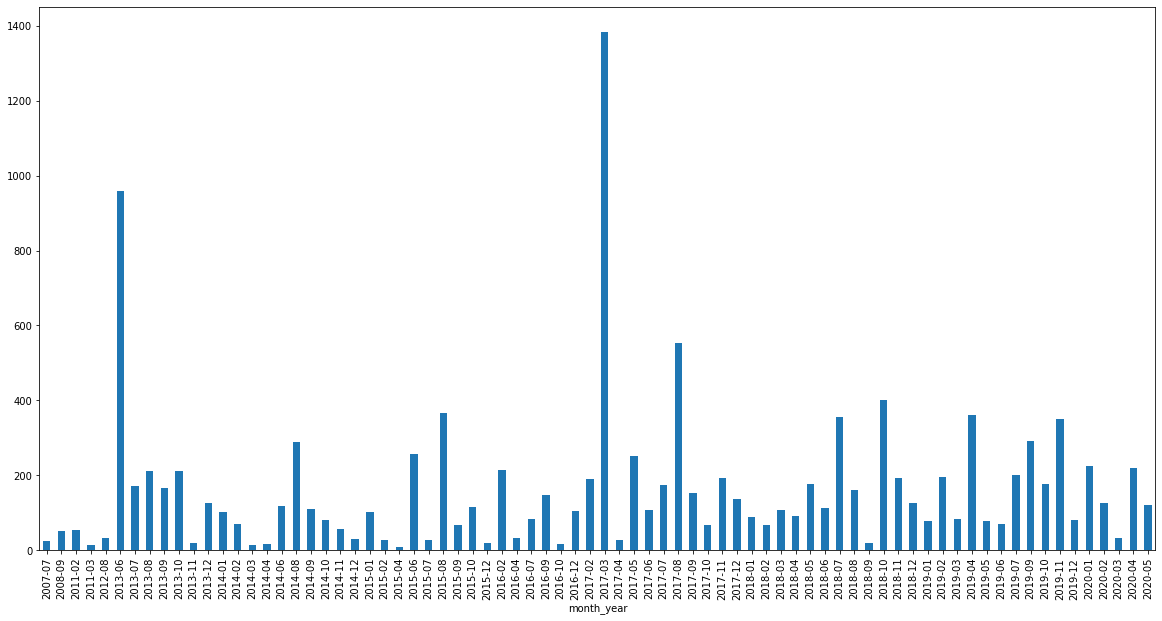

In [19]:
monthly_orders.plot.bar(figsize=(20,10))

Not a bad graph, but the format is still a little difficult to understand. For example, you can't tell the general sense of time because each bar only represents a date where an order was made.

It'd be better to see the trends over time, so I'll use Seaborn to create a better looking graph that captures all dates (even days with no orders).

Let's make this a little prettier.

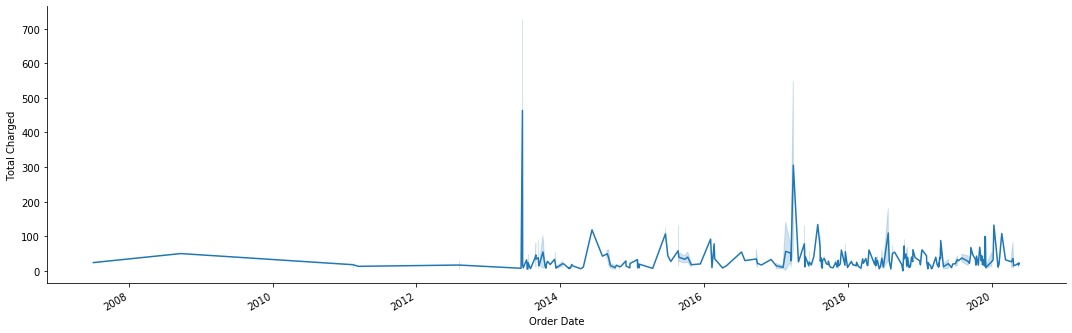

In [20]:
# To design a prettier graph, while observing every day (even days with no orders)

import seaborn as sns

g = sns.relplot(x="Order Date", y="Total Charged", kind="line", data=df, height=5, aspect=3)
g.fig.autofmt_xdate()

Now this graph is a _much_ better interpretation of how my online spending changed over the years.

I can identify 3 distinct phases of my life where spikes in my spending occurred:
1. Entered college in 2013
2. Took a gap year in 2017, traveling and interning throughout the US
3. Graduated USC in 2018 up until today

These events represented different facets of my growth as a student and a professional.

Reflecting on all of this now helps me realize how addicted to online shopping I was in the past. I haven't completely cured it, but I think my relationship with money, objects, and happiness have all been improved since graduating college in 2018.

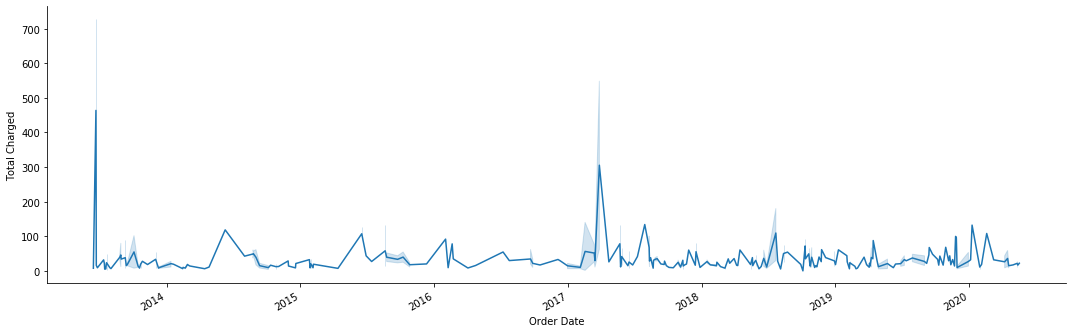

In [21]:
# Graph from 2013 - 2020

import datetime as dt

df_2013_2020 = df[df["Order Date"] > dt.datetime(2013, 1, 1)]

g = sns.relplot(x="Order Date", y="Total Charged", kind="line", data=df_2013_2020, height=5, aspect=3)
g.fig.autofmt_xdate()

## Conclusion

This whole project helped me reflect on my online spending as time went on.

We learned:
- How much I spent on Amazon during this period from 2007 - 2020.
- What my highest, lowest, and average order totals were.
- How much tax I paid, and the effective sales tax rate I paid.
- How my spending fluctuated over time
- On which days I spent the most money

This is especially revealing to me as I seek to enter a new phase in my life, where I am more conscious with my spending habits.

Project Inspiration Source: https://www.dataquest.io/blog/how-much-spent-amazon-data-analysis/